In [1]:
import pandas as pd 
import numpy as np
#from helpers import *
#import coach_dicts
import os

#import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Validation libraries
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, balanced_accuracy_score, precision_score, precision_recall_curve
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import log_loss, roc_curve, auc


# Display plots inside the notebook
%matplotlib inline

# Ignore warning related to pandas_profiling
import warnings
warnings.filterwarnings('ignore') 

from pathlib import Path

# Display all dataframe columns in outputs (it has 63 columns, which is wider than the notebook)
# This sets it up to display with a horizontal scroll instead of hiding the middle columns
pd.set_option('display.max_columns', 800) 
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 1800)

In [2]:
path = os.environ.get("DATA_PATH")

In [3]:
data = "001_evaluation_20201013_clean_unordered.csv"

In [4]:
df = pd.read_csv(path + data, sep=",", low_memory = False)

In [5]:
df.replace (' ', np.nan, inplace=True)

In [6]:
df.shape

(13300, 1304)

In [7]:
df.columns.tolist()

['accessCodeId',
 'mtkId',
 'codeEntered',
 'registration',
 'studyInfo',
 'studyVariant',
 'coach',
 'problem',
 'coach.note',
 'dropout',
 'M1_measurementPos',
 'M2_measurementPos',
 'M3_measurementPos',
 'M4_measurementPos',
 'M5_measurementPos',
 'M6_measurementPos',
 'M7_measurementPos',
 'TI_score',
 'TI_bip1',
 'TI_bip2',
 'TI_hyp.x',
 'TI_MDE',
 'TI_dyst',
 'TI_MDE.x',
 'TI_20.xx',
 'TI_F20.8',
 'TI_F25',
 'TI_F22',
 'TI_F23',
 'TI_F29',
 'TI_MDE_vr',
 'TI_MDE_tr',
 'TI_HYP_vr',
 'TI_MAN_vr',
 'TI_medik',
 'TI_komm',
 'TI_inkl',
 'TI_rekrut',
 'in_ther1',
 'in_ther2',
 'in_med1',
 'in_med2',
 '1_module',
 '2_module',
 '3_module',
 '4_module',
 '5_module',
 '6_module',
 '7_module',
 'POST_WL_screening_start',
 'POST_screening_start',
 'FU1_screening_start',
 'FU2_screening_start',
 'FU3_screening_start',
 '1_login',
 '2_login',
 '3_login',
 '4_login',
 '5_login',
 '6_login',
 '7_login',
 '1_login.duration',
 '2_login.duration',
 '3_login.duration',
 '4_login.duration',
 '5_login

### Create shortened df 

The following predictors were chosen for the current analysis:

- df2 = BDI/PHQ (Post), PHQ M1, Pre: SKID-Diagnosen, IMET, EUROHIS_QUOL, BDI, PHQ-D, PHQ-S, GAD, Soziodemographisch, Costa, GPSE, BSSS, PATHEV + EUHEALS, IPQ-R, PVQ, SEWiP, Nutzung d. Gesundheitswesens 
- additional = 2_letter, 2_letter_size, 2_fb_size, 2_reminder, 2_module, 1_letter, 1_letter_size

In [8]:
column_zwei = ['registration','studyVariant','coach','PRE_bdi1','PRE_bdi2',
               'PRE_bdi3','PRE_bdi4','PRE_bdi5','PRE_bdi6','PRE_bdi7','PRE_bdi8','PRE_bdi9','PRE_bdi10',
               'PRE_bdi11','PRE_bdi12','PRE_bdi13','PRE_bdi14','PRE_bdi15','PRE_bdi16','PRE_bdi17','PRE_bdi18',
               'PRE_bdi19','PRE_bdi20','PRE_bdi21','POST_phqD1','POST_phqD2','POST_phqD3','POST_phqD4','POST_phqD5',
               'POST_phqD6','POST_phqD7','POST_phqD8','POST_phqD9',
               'PRE_phqS1','PRE_phqS2','PRE_phqS3','PRE_phqS4','PRE_phqS5','PRE_phqS6','PRE_phqS7',
               'PRE_phqS8','PRE_phqS9','PRE_phqS10','PRE_phqD1','PRE_phqD2','PRE_phqD3','PRE_phqD4','PRE_phqD5',
               'PRE_phqD6','PRE_phqD7','PRE_phqD8','PRE_phqD9', 'PRE_birth','PRE_sex','PRE_education',
               'PRE_work','PRE_household','PRE_relation','PRE_residence','PRE_internet','PRE_height','PRE_weight',
               'PRE_treatment','PRE_support','PRE_kPT','PRE_ill','PRE_sickleave','PRE_doc',
               'PRE_neurol','PRE_selfhelp','PRE_counsel','PRE_therapy','PRE_med','PRE_hospital',
            'PRE_eurohis1','PRE_eurohis2','PRE_eurohis3','PRE_eurohis4','PRE_eurohis5',
               'PRE_eurohis6','PRE_eurohis7','PRE_eurohis8', 'TI_score',
               'TI_MDE','TI_dyst','TI_MDE_vr','TI_MDE_tr','TI_medik','PRE_gad1',
               'PRE_gad2','PRE_gad3','PRE_gad4','PRE_gad5','PRE_gad6','PRE_gad7', 'PRE_costa1', 'PRE_costa2',  'PRE_costa5', 'PRE_costa6', 'PRE_costa8', 'PRE_costa10', 'PRE_costa11',
              'PRE_costa12', 'PRE_costa13', 'PRE_costa14', 'PRE_costa15', 'PRE_costa18',
              'PRE_pathev1', 'PRE_pathev2', 'PRE_pathev3', 'PRE_pathev4',
              'PRE_pathev5', 'PRE_pathev6', 'PRE_pathev7', 'PRE_pathev8', 'PRE_pathev9', 'PRE_pathev10', 
              'PRE_euheals1','PRE_euheals2','PRE_euheals3','PRE_ipqr1','PRE_ipqr2','PRE_ipqr3','PRE_ipqr4','PRE_ipqr5',
               'PRE_ipqr6','PRE_ipqr7','PRE_ipqr8','PRE_ipqr9','PRE_ipqr10','PRE_ipqr11','PRE_ipqr12','PRE_ipqr13',
               'PRE_ipqr14','PRE_ipqr15','PRE_ipqr16','PRE_ipqr17','PRE_ipqr18', 'PRE_bsss1','PRE_bsss2','PRE_bsss3',
               'PRE_bsss4','PRE_bsss5','PRE_bsss6','PRE_bsss7','PRE_bsss8','PRE_bsss9','PRE_bsss10','PRE_bsss11',
               'PRE_bsss12','PRE_bsss13','PRE_gpse1','PRE_gpse2','PRE_gpse3','PRE_gpse4','PRE_gpse5','PRE_gpse6',
               'PRE_gpse7','PRE_gpse8','PRE_gpse9','PRE_gpse10','PRE_pvq1','PRE_pvq2','PRE_pvq3','PRE_pvq4','PRE_pvq5',
               'PRE_pvq6','PRE_pvq7','PRE_pvq8','PRE_pvq9','PRE_pvq10','PRE_pvq11','PRE_pvq12','PRE_pvq13','PRE_pvq14',
               'PRE_pvq15','PRE_pvq16','PRE_pvq17','PRE_pvq18','PRE_pvq19','PRE_pvq20','PRE_pvq21', 'PRE_imet1','PRE_imet2','PRE_imet3','PRE_imet4','PRE_imet5','PRE_imet6','PRE_imet7',
                'PRE_imet8','PRE_imet9','PRE_imet10', 'M1_phqD1','M1_phqD2','M1_phqD3','M1_phqD4','M1_phqD5','M1_phqD6',
               'M1_phqD7','M1_phqD8','M1_phqD9', 'M3_phqD1', 'M3_phqD2', 'M3_phqD3', 'M3_phqD4', 'M3_phqD5', 'M3_phqD6',
               'M3_phqD7', 'M3_phqD8', 'M3_phqD9',
              'M3_sewip1','M3_sewip2','M3_sewip3','M3_sewip4','M3_sewip5','M3_sewip6','M3_sewip7','M3_sewip8',
                    'M3_sewip9','M3_sewip10','M3_sewip11','M3_sewip12','M3_sewip13','M3_sewip14','M3_sewip15','M3_sewip16','M3_sewip17',
                    'M3_sewip18','M3_sewip19','M3_sewip20','M3_sewip21',
                'M3_costa1','M3_costa2','M3_costa5','M3_costa6','M3_costa8',
                    'M3_costa10','M3_costa11','M3_costa12','M3_costa13','M3_costa14','M3_costa15',
                    'M3_costa18']

To Do:
* df["dropout"] umändern in binäre Variablen
* Study Variant in binäre Variable
* Birth Year in Age umwandeln
* Hight und Weight in BDI umwandeln
* Anzahl Diagnosen zählen
* Therapist Variablen anonymisieren und Alter, Geschlecht, Abschluss extrahieren
* Skalen auswerten: IPQr8 umpolen, IMET10 umpolen
* Dummy Categorize TI_rekrut, PRE_work, PRE_household, PRE_residence
* Standardize TI_Score, BMI, Age, Internet (optional; not necessary for RF; erst nach Train-Test_Split)
* Transform Post_BDI to RCI 
* Idea: Handle registration date as cyclical feature
* Idea: Fancier strategies for missing values

Notizen:
* PRE_pt_planned raus, da PatientInnen ausgeschlossen werden, die eine PT geplant haben

In [9]:
df2 = df[column_zwei]

In [10]:
df2 = df2[df2["studyVariant"].notnull()]

In [11]:
df2.shape

(2304, 243)

# 1. Prepare first dataframe for first analysis 

## 1.1 Check out Missing Values 

### 1.1.1 Drop rows with missing values on outcome

In [12]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()

        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)

        # Type of missing column
        answer_type = [df[column].unique() if df[column].nunique() < 15 else "Free Text or Numeric Input" for column in df.columns]
        answer_df = pd.DataFrame(answer_type, index = df.columns)

        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent, answer_df], axis=1)

        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values', 2: 'Answers'})

        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

        # Print some summary information
        print ("The dataset has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")

        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [13]:
miss_df2 = missing_values_table(df2)
miss_df2

The dataset has 243 columns.
There are 164 columns that have missing values.


,Missing Values,% of Total Values,Missing Values
POST_phqD1,661,28.7,"[1.0, nan, 2.0, 0.0, 3.0]"
POST_phqD3,661,28.7,"[1.0, 2.0, nan, 3.0, 0.0]"
POST_phqD4,661,28.7,"[1.0, 2.0, nan, 0.0, 3.0]"
POST_phqD5,661,28.7,"[2.0, 1.0, nan, 0.0, 3.0]"
POST_phqD6,661,28.7,"[0.0, nan, 2.0, 1.0, 3.0]"
POST_phqD7,661,28.7,"[1.0, nan, 0.0, 2.0, 3.0]"
POST_phqD8,661,28.7,"[0.0, 1.0, nan, 2.0, 3.0]"
POST_phqD9,661,28.7,"[0.0, nan, 1.0, 2.0]"
POST_phqD2,661,28.7,"[1.0, nan, 2.0, 0.0, 3.0]"
M3_sewip20,327,14.2,"[4.0, 3.0, nan, 5.0, 1.0, 2.0]"


In [14]:
post_phq_columns = ['POST_phqD1','POST_phqD2','POST_phqD3','POST_phqD4','POST_phqD5',
               'POST_phqD6','POST_phqD7','POST_phqD8','POST_phqD9']

In [15]:
df2 = df2[df2[post_phq_columns].notnull().all(axis=1)]

In [16]:
df2.shape

(1643, 243)

In [17]:
miss_df2 = missing_values_table(df2)
miss_df2

The dataset has 243 columns.
There are 152 columns that have missing values.


,Missing Values,% of Total Values,Missing Values
M3_sewip20,97,5.9,"[4.0, 3.0, 5.0, 1.0, 2.0, nan]"
M3_sewip17,96,5.8,"[4.0, 2.0, 3.0, 5.0, 1.0, nan]"
M3_sewip19,95,5.8,"[3.0, 4.0, 5.0, 1.0, 2.0, nan]"
M3_sewip12,87,5.3,"[4.0, 3.0, 5.0, 1.0, 2.0, nan]"
M3_sewip13,85,5.2,"[4.0, 3.0, 5.0, 1.0, 2.0, nan]"
M3_sewip14,82,5.0,"[4.0, 2.0, 3.0, 5.0, 1.0, nan]"
M3_sewip21,81,4.9,"[4.0, 2.0, 3.0, 5.0, 1.0, nan]"
M3_sewip6,79,4.8,"[5.0, 3.0, 2.0, 1.0, 4.0, nan]"
M3_sewip18,78,4.7,"[4.0, 3.0, 5.0, 1.0, 2.0, nan]"
M3_sewip10,75,4.6,"[4.0, 2.0, 5.0, 3.0, 1.0, nan]"


In [18]:
m3_phq_cols = ['M3_phqD1','M3_phqD2','M3_phqD3','M3_phqD4','M3_phqD5',\
               'M3_phqD6','M3_phqD7','M3_phqD8','M3_phqD9']

In [19]:
m3_sewip_cols = ['M3_sewip1','M3_sewip2','M3_sewip3','M3_sewip4','M3_sewip5','M3_sewip6','M3_sewip7','M3_sewip8',
                    'M3_sewip9','M3_sewip10','M3_sewip11','M3_sewip12','M3_sewip13','M3_sewip14','M3_sewip15','M3_sewip16','M3_sewip17',
                    'M3_sewip18','M3_sewip19','M3_sewip20','M3_sewip21']

In [20]:
df2 = df2[df2[m3_phq_cols].notnull().all(axis=1)]

### 1.1.2 Drop columns referring to exclusion criteria

Diagnosen:
* F20.8: Schizophrenie = Exclusion criterion --> Drop 
* F29: Nicht näher bezeichnete nichtorganische Psychose = Exclusion criterion --> Drop
* F23: Akute vorübergehende psychotische Störungen = Exclusion criterion --> Drop
* F22: Wahnhafte Störung = Exclusion criterion --> Drop
* F25: Schizoaffektive Störung = Exclusion criterion --> Drop
* F20: Paranoide Schizophrenie = Exclusion criterion --> Drop
* TI_hyp_x: Hypomania --> Drop

### 1.1.3 Replace missing categorical values with mode

Some data types are object --> we will turn them numeric to allow replacement with mode value

In [21]:
miss_df2 = missing_values_table(df2)
missing_cols = miss_df2.index.tolist()

The dataset has 243 columns.
There are 134 columns that have missing values.


In [22]:
for column in missing_cols:
    df2[column] = pd.to_numeric(df2[column], errors='coerce').astype('Int64')

In [23]:
def fillna_with_mean(df, column):
    mean = df[column].mean()
    mean = int(mean)

    df[column] = df[column].fillna(mean)

In [24]:
for column in missing_cols:
    fillna_with_mean(df2, column)

In [25]:
filename = path + "prepared_data.csv"
df2.to_csv(filename, sep=";", encoding="utf-8", index=False)

Categorical features: "PRE_work", "PRE_household", "PRE_residence", "PRE_relation", 'PRE_sickleave',"registration", "coach"

## 1.2 Aggregate and Transform columns

### 1.2.1 Turn study variant into a binary variable

In [26]:
#df2['studyVariant'] = pd.get_dummies(df2['studyVariant'])

### 1.2.4 Check dtypes and answer formats

In [27]:
#answer_table = show_answers(df2)
#answer_table

--> Data types of some scales have to be changed from object to numeric to create sum scores

### 1.2.5 Create Sum Scores of clinical screenings

#### BDI-II

In [28]:
pre_bdi_columns = ['PRE_bdi1','PRE_bdi2','PRE_bdi3',
               'PRE_bdi4','PRE_bdi5','PRE_bdi6','PRE_bdi7','PRE_bdi8','PRE_bdi9','PRE_bdi10','PRE_bdi11','PRE_bdi12',
               'PRE_bdi13','PRE_bdi14','PRE_bdi15','PRE_bdi16','PRE_bdi17','PRE_bdi18','PRE_bdi19','PRE_bdi20',
               'PRE_bdi21']

In [29]:
df2["PRE_bdi_sum"] = df2[pre_bdi_columns].sum(axis=1).astype('Int64')

#### PHQ-D

In [30]:
pre_phq_columns = ['PRE_phqD1','PRE_phqD2','PRE_phqD3','PRE_phqD4','PRE_phqD5','PRE_phqD6','PRE_phqD7',
               'PRE_phqD8','PRE_phqD9']

In [31]:
df2[pre_phq_columns] = df2[pre_phq_columns].apply(pd.to_numeric, errors='coerce').astype('Int64')

In [32]:
df2["phq_d_sum"] = df2[pre_phq_columns].sum(axis=1)

 **PHQ-D Outcome**

In [33]:
post_phq_columns = ['POST_phqD1', 'POST_phqD2','POST_phqD3','POST_phqD4','POST_phqD5',
               'POST_phqD6','POST_phqD7','POST_phqD8','POST_phqD9']

In [34]:
df2[post_phq_columns] = df2[post_phq_columns].apply(pd.to_numeric, errors='coerce').astype('Int64')

In [35]:
df2["phq_post"] = df2[post_phq_columns].sum(axis=1)

#### PHQ-S

In [36]:
phq_s_columns = ['PRE_phqS1','PRE_phqS2','PRE_phqS3','PRE_phqS4','PRE_phqS5','PRE_phqS6','PRE_phqS7',
               'PRE_phqS8','PRE_phqS9', 'PRE_phqS10']

In [37]:
df2[phq_s_columns] = df2[phq_s_columns].apply(pd.to_numeric, errors='coerce').astype('Int64')

In [38]:
df2["phq_s_sum"] = df2[phq_s_columns].sum(axis=1)

#### EUROHIS-QOL

In [39]:
eurohis_columns = ['PRE_eurohis1','PRE_eurohis2','PRE_eurohis3','PRE_eurohis4','PRE_eurohis5','PRE_eurohis6',
                   'PRE_eurohis7','PRE_eurohis8']

In [40]:
df2[eurohis_columns] = df2[eurohis_columns].apply(pd.to_numeric, errors='coerce').astype('Int64')

In [41]:
df2["eurohis_sum"] = df2[eurohis_columns].sum(axis=1)

#### IMET

In [42]:
imet_columns = ['PRE_imet1','PRE_imet2','PRE_imet3','PRE_imet4','PRE_imet5','PRE_imet6','PRE_imet7',
                'PRE_imet8','PRE_imet10']

In [43]:
df2[imet_columns] = df2[imet_columns].apply(pd.to_numeric, errors='coerce')

In [44]:
df2['PRE_imet10'] = df2['PRE_imet10'].map({0:10, 1:9, 2:8, 3:7, 4:6, 5:5, 6:4, 7:3, 8:2, 9:1, 10:0})

In [45]:
df2["imet_sum"] = df2[imet_columns].sum(axis=1)

#### GAD7

In [46]:
gad_columns= ['PRE_gad1','PRE_gad2','PRE_gad3','PRE_gad4','PRE_gad5','PRE_gad6','PRE_gad7']

In [47]:
df2[gad_columns] = df2[gad_columns].apply(pd.to_numeric, errors='coerce').astype('Int64')

In [48]:
df2["gad_sum"] = df2[gad_columns].sum(axis=1)

**Costa PRE**

In [49]:
costa_columns = ['PRE_costa1', 'PRE_costa2', 'PRE_costa5', 'PRE_costa6',
                        'PRE_costa8', 'PRE_costa10', 'PRE_costa11','PRE_costa12', 'PRE_costa13', 'PRE_costa14',
                        'PRE_costa15', 'PRE_costa18']
            
df2[costa_columns] = df2[costa_columns].apply(pd.to_numeric, errors='coerce').astype('Int64')
df2["costa_sum"] = df2[costa_columns].sum(axis=1).astype('Int64')

**Costa Week2**

In [50]:
 M3_costa_cols = ['M3_costa1','M3_costa2','M3_costa5','M3_costa6','M3_costa8',
                    'M3_costa10','M3_costa11','M3_costa12','M3_costa13','M3_costa14','M3_costa15',
                    'M3_costa18']

In [51]:
df2[M3_costa_cols] = df2[M3_costa_cols].apply(pd.to_numeric, errors='coerce').astype('Int64')

In [52]:
df2["M3_costa_sum"] = df2[M3_costa_cols].sum(axis=1).astype('Int64')

In [53]:
df2["costa_early_change"] = df2["M3_costa_sum"] - df2["costa_sum"]

**PHQ-D Week2**

In [54]:
early_phq_columns = ['M3_phqD1','M3_phqD2','M3_phqD3','M3_phqD4','M3_phqD5','M3_phqD6','M3_phqD7','M3_phqD8','M3_phqD9']
df2[early_phq_columns] = df2[early_phq_columns].apply(pd.to_numeric, errors='coerce').astype('Int64')
df2["phq_early_sum"] = df2[early_phq_columns].sum(axis=1)
df2["phq_early_change"] = df2["phq_d_sum"] - df2["phq_early_sum"]

**Sewip**

In [55]:
M3_sewip_cols = ['M3_sewip1','M3_sewip2','M3_sewip3','M3_sewip4','M3_sewip5','M3_sewip6','M3_sewip7','M3_sewip8',
                    'M3_sewip9','M3_sewip10','M3_sewip11','M3_sewip12','M3_sewip13','M3_sewip14','M3_sewip15','M3_sewip16','M3_sewip17',
                    'M3_sewip18','M3_sewip19','M3_sewip20','M3_sewip21']

In [56]:
df2[M3_sewip_cols] = df2[M3_sewip_cols].apply(pd.to_numeric, errors='coerce').astype('Int64')

In [57]:
for column in M3_sewip_cols:
    df2[column] = df2[column].map({1:0,2:1, 3:2, 4:3, 5:4})

In [58]:
df2["M3_sewip_sum"] = df2[M3_sewip_cols].sum(axis=1).astype('Int64')

**Pathev**

Therapieerwartung und Therapieevaluation. 1,5,9,10 sind umzupolen. Auswertung auf Einzel- und Subskalenebene 

In [59]:
pathev_columns = ['PRE_pathev1', 'PRE_pathev2', 'PRE_pathev3', 'PRE_pathev4','PRE_pathev5', 'PRE_pathev6', 
                  'PRE_pathev7', 'PRE_pathev8', 'PRE_pathev9', 'PRE_pathev10']

In [60]:
df2[pathev_columns] = df2[pathev_columns].apply(pd.to_numeric, errors='coerce').astype('Int64')

In [61]:
invert_columns = ['PRE_pathev1','PRE_pathev5','PRE_pathev9', 'PRE_pathev10']

In [62]:
for column in invert_columns:
    df2[column] = df2[column].map({1:5, 2:4, 3:3, 4:2, 5:1})

In [63]:
df2["pathev_zuv"] = df2[['PRE_pathev1','PRE_pathev4', 'PRE_pathev5', 'PRE_pathev9']].sum(axis=1).astype('Int64')
df2["pathev_fur"] = df2[['PRE_pathev3', 'PRE_pathev7']].sum(axis=1).astype('Int64')
df2["pathev_pas"] = df2[['PRE_pathev2', 'PRE_pathev6', 'PRE_pathev8', 'PRE_pathev10']].sum(axis=1).astype('Int64')

**IPQ-R**

Krankheitswahrnehmung. Item 8 ist invertiert. Auswertung = Summenscore


In [64]:
ipqr_columns = ['PRE_ipqr1','PRE_ipqr2','PRE_ipqr3','PRE_ipqr4','PRE_ipqr5',
               'PRE_ipqr6','PRE_ipqr7','PRE_ipqr8','PRE_ipqr9','PRE_ipqr10','PRE_ipqr11','PRE_ipqr12','PRE_ipqr13',
               'PRE_ipqr14','PRE_ipqr15','PRE_ipqr16','PRE_ipqr17','PRE_ipqr18']

In [65]:
df2[ipqr_columns] = df2[ipqr_columns].apply(pd.to_numeric, errors='coerce')

In [66]:
df2['PRE_ipqr7'] = df2['PRE_ipqr7'].map({1:5, 2:4, 3:3, 4:2, 5:1})
df2['PRE_ipqr9'] = df2['PRE_ipqr9'].map({1:5, 2:4, 3:3, 4:2, 5:1})
df2['PRE_ipqr10'] = df2['PRE_ipqr10'].map({1:5, 2:4, 3:3, 4:2, 5:1})
df2['PRE_ipqr11'] = df2['PRE_ipqr11'].map({1:5, 2:4, 3:3, 4:2, 5:1})
df2['PRE_ipqr12'] = df2['PRE_ipqr12'].map({1:5, 2:4, 3:3, 4:2, 5:1})

df2["ipqr_timeline"] = df2[['PRE_ipqr1','PRE_ipqr2','PRE_ipqr3']].sum(axis=1).astype('Int64')
df2["ipqr_cons"] = df2[['PRE_ipqr4','PRE_ipqr5','PRE_ipqr6']].sum(axis=1).astype('Int64')
df2["ipqr_perscont"] = df2[['PRE_ipqr7','PRE_ipqr8','PRE_ipqr9']].sum(axis=1).astype('Int64')
df2["ipqr_illcoher"] = df2[['PRE_ipqr10','PRE_ipqr11','PRE_ipqr12']].sum(axis=1).astype('Int64')
df2["ipqr_timecycl"] = df2[['PRE_ipqr13','PRE_ipqr14','PRE_ipqr15']].sum(axis=1).astype('Int64')
df2["ipqr_emotrep"] = df2[['PRE_ipqr16','PRE_ipqr17','PRE_ipqr18']].sum(axis=1).astype('Int64')


In [67]:
df2["ipqr_sum"] = df2[ipqr_columns].sum(axis=1).astype('Int64')

**GPSE**

Selbstwirksamkeitserwartung. Nur eine Skala --> Summenwert

In [68]:
gpse_columns = ['PRE_gpse1','PRE_gpse2','PRE_gpse3','PRE_gpse4','PRE_gpse5','PRE_gpse6',
               'PRE_gpse7','PRE_gpse8','PRE_gpse9','PRE_gpse10']

In [69]:
df2[gpse_columns] = df2[gpse_columns].apply(pd.to_numeric, errors='coerce')

In [70]:
df2["gpse_sum"] = df2[gpse_columns].sum(axis=1).astype('Int64')

**BSSS**

Berliner Social Support Skalen. 2 Subskalen: Perceived Support (Item 1-8), Support Seeking (Item 9-13)

In [71]:
bsss_columns = ['PRE_bsss1','PRE_bsss2','PRE_bsss3','PRE_bsss4','PRE_bsss5','PRE_bsss6','PRE_bsss7','PRE_bsss8',
                'PRE_bsss9','PRE_bsss10','PRE_bsss11','PRE_bsss12','PRE_bsss13']

In [72]:
df2[bsss_columns] = df2[bsss_columns].apply(pd.to_numeric, errors='coerce').astype('Int64')

In [73]:
df2["bsss_perceived"] = df2[['PRE_bsss1','PRE_bsss2','PRE_bsss3','PRE_bsss4','PRE_bsss5','PRE_bsss6','PRE_bsss7',
                           'PRE_bsss8']].sum(axis=1).astype('Int64')

In [74]:
df2["bsss_suppseek"] = df2[['PRE_bsss9','PRE_bsss10','PRE_bsss11','PRE_bsss12','PRE_bsss13']].sum(axis=1).astype('Int64')

**PVQ**

Subskalen: Selbstbestimmung (Item 1,11), Macht (Item 2,17), Universalismus (Item 3,8,19), Leistung (Item 4,13), Sicherheit (Item 5,14), Stimulation (Item 6,15), Konformität (Item 7,16), Tradition (Item 9, 20), Hedonismus (Item 10,21), Benevolenz (Item 12,18) --> Summenscores machen wenig Sinn

In [75]:
pvq_columns = ['PRE_pvq1','PRE_pvq2','PRE_pvq3','PRE_pvq4','PRE_pvq5','PRE_pvq6','PRE_pvq7','PRE_pvq8','PRE_pvq9',
               'PRE_pvq10','PRE_pvq11','PRE_pvq12','PRE_pvq13','PRE_pvq14','PRE_pvq15','PRE_pvq16','PRE_pvq17',
               'PRE_pvq18','PRE_pvq19','PRE_pvq20','PRE_pvq21']

In [76]:
df2[pvq_columns] = df2[pvq_columns].apply(pd.to_numeric, errors ='coerce').astype('Int64')

### 1.2.6 Change birthyear to age, registration date to registration year and create corona variable

In [77]:
df2["registration_dt"] = pd.to_datetime(df2["registration"])

In [78]:
df2["corona_train"] = np.where((df2["registration_dt"] >= pd.Timestamp(2020, 1, 15)),1,0)

In [79]:
df2["age"] = df2["registration_dt"].dt.year - df2['PRE_birth']

In [80]:
df2["registration"] = df2["registration_dt"].dt.year

In [81]:
df2.drop(["registration_dt", "PRE_birth"], axis=1, inplace= True)

### 1.2.6 Create BMI-score from height and weight columns

In [82]:
df2['PRE_height'] = df2['PRE_height']/100

In [83]:
df2["bmi_score"] = df2['PRE_weight']/ (df2['PRE_height']*df2['PRE_height'])

In [84]:
df2.drop(['PRE_weight', 'PRE_height'], axis=1, inplace=True)

### 1.2.7 ReCategorize PRE_work, PRE_household, PRE_residence, PRE_relation

In [85]:
df2["PRE_residence"].replace(5,4)
df2["PRE_household"].replace(3,4)
df2["PRE_work"].replace(3,4)
df2["PRE_work"].replace(5,6)
df2["PRE_work"].replace(1,7)
df2["PRE_relation"].replace(3,0)
df2["PRE_education"].replace(0,1)

4        2.0
8        1.0
22       1.0
27       1.0
30       0.0
31       1.0
42       1.0
53       0.0
59       1.0
63       0.0
65       0.0
66       1.0
67       0.0
71       0.0
73       2.0
75       1.0
77       1.0
80       0.0
82       0.0
86       1.0
88       1.0
94       1.0
96       1.0
100      0.0
103      1.0
104      0.0
106      2.0
107      1.0
118      1.0
119      0.0
122      0.0
124      0.0
128      1.0
131      1.0
133      1.0
134      2.0
146      0.0
148      2.0
150      1.0
153      1.0
155      1.0
159      1.0
160      0.0
164      2.0
167      2.0
172      1.0
173      1.0
175      0.0
177      0.0
179      1.0
180      0.0
183      0.0
187      0.0
188      1.0
190      1.0
191      1.0
194      0.0
195      1.0
202      0.0
203      1.0
205      0.0
206      1.0
213      1.0
215      1.0
216      0.0
227      1.0
229      1.0
235      0.0
238      1.0
245      0.0
246      0.0
258      1.0
262      1.0
267      1.0
268      1.0
271      1.0
275      0.0

### 1.2.8 Create RCI Variable for BDI as outcome

In [86]:
df2["phq_change"] = df2["phq_d_sum"] - df2["phq_post"]

In [87]:
df2["phq_change_2"] = np.where(((df2['phq_change'] >= 5) & (df2["phq_post"] <= 9)),0,1)

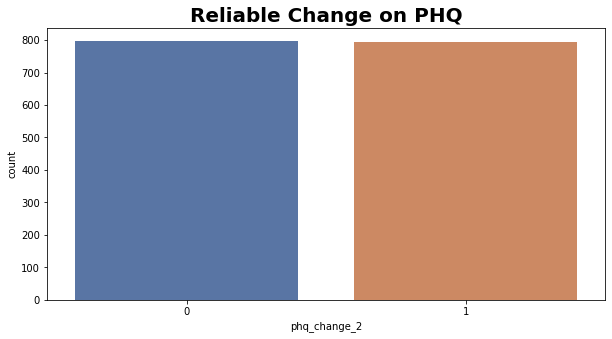

In [88]:
import seaborn as sns

plt.figure(figsize=(10,5)) # Größe der Graphik festlegen
sns.countplot('phq_change_2',data = df2, palette="deep") # Welche Daten? Welche Farbpalette?
plt.title("Reliable Change on PHQ",fontsize=20,fontweight="bold") 
plt.show()

In [89]:
df2.groupby("phq_change_2")["phq_post"].count()

phq_change_2
0    797
1    794
Name: phq_post, dtype: int64

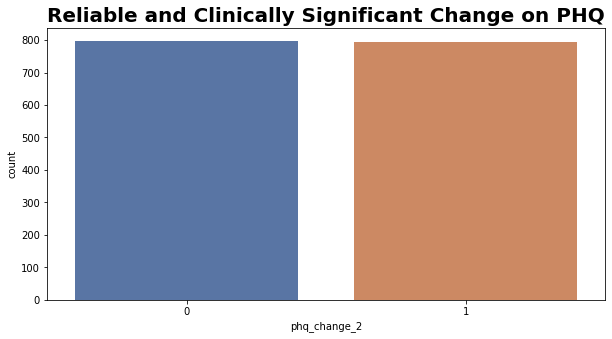

In [90]:
plt.figure(figsize=(10,5)) # Größe der Graphik festlegen
sns.countplot("phq_change_2",data = df2, palette="deep") # Welche Daten? Welche Farbpalette?
plt.title("Reliable and Clinically Significant Change on PHQ",fontsize=20,fontweight="bold") 
plt.show()

### TableOne

In [91]:
from tableone import TableOne

In [92]:
convert_cols = ['ipqr_sum','gpse_sum', 'pathev_zuv', 'pathev_fur','pathev_pas', 'costa_sum',\
                'M3_costa_sum', 'M3_sewip_sum'] 

In [93]:
for col in convert_cols:
    df2[col] = df2[col].astype(int)

In [94]:
columns = ['age', 'PRE_sex', 'PRE_education', 'PRE_household', 'PRE_relation', 'PRE_work', \
           'corona_train', 'registration', 'bmi_score', 'phq_d_sum', 'phq_s_sum', 'eurohis_sum', 'imet_sum','gad_sum'\
           ,'ipqr_sum','gpse_sum', 'pathev_zuv', 'pathev_fur','pathev_pas', 'costa_sum', \
            'M3_costa_sum','phq_early_sum', "M3_sewip_sum"]

In [95]:
categorical = ['PRE_education', 'PRE_household', 'PRE_work', 'PRE_relation', 'corona_train', 'registration']

In [96]:
groupby = 'phq_change_2'

In [97]:
mytable = TableOne(df2, columns=columns,
                   groupby=groupby, categorical=categorical, \
                   pval=True, dip_test=True, normal_test=True, tukey_test=True, smd=True, htest_name=True)

In [98]:
mytable

Grouped by phq_change_2                                                                                                    
                                              Missing      Overall            0            1 P-Value                                       Test SMD (0,1)
n                                                             1591          797          794                                                             
age, mean (SD)                                      0  43.5 (12.8)  43.5 (12.8)  43.4 (12.9)   0.895                          Two Sample T-test    -0.007
PRE_sex, mean (SD)                                  0    0.6 (0.5)    0.6 (0.5)    0.6 (0.5)   0.965                          Two Sample T-test     0.002
PRE_education, n (%)     0.0                        0      2 (0.1)      2 (0.3)                0.112  Chi-squared (warning: expected count < 5)     0.150
                         1.0                              66 (4.1)     38 (4.8)     28 (3.5)                                                             
                         2.0                            283 (17.8)   155 (19.4)   128 (16.1)                                                             
                         3.0                            372 (23.4)   180 (22.6)   192 (24.2)                                                             
                         4.0                            189 (11.9)   100 (12.5)    89 (11.2)                                                             
                         5.0                            679 (42.7)   322 (40.4)   357 (45.0)                                                             
PRE_household, n (%)     0.0                        0   412 (25.9)   205 (25.7)   207 (26.1)   0.553                                Chi-squared     0.087
                         1.0                            536 (33.7)   263 (33.0)   273 (34.4)                                                             
                         2.0                            424 (26.6)   226 (28.4)   198 (24.9)                                                             
                         3.0                              65 (4.1)     29 (3.6)     36 (4.5)                                                             
                         4.0                             154 (9.7)     74 (9.3)    80 (10.1)                                                             
PRE_relation, n (%)      0.0                        0   666 (41.9)   330 (41.4)   336 (42.3)   0.845                                Chi-squared     0.045
                         1.0                            754 (47.4)   384 (48.2)   370 (46.6)                                                             
                         2.0                             149 (9.4)     71 (8.9)     78 (9.8)                                                             
                         3.0                              22 (1.4)     12 (1.5)     10 (1.3)                                                             
PRE_work, n (%)          1.0                        0     96 (6.0)     42 (5.3)     54 (6.8)   0.379                                Chi-squared     0.127
                         2.0                           1045 (65.7)   538 (67.5)   507 (63.9)                                                             
                         3.0                             145 (9.1)     78 (9.8)     67 (8.4)                                                             
                         4.0                              15 (0.9)      7 (0.9)      8 (1.0)                                                             
                         5.0                              98 (6.2)     46 (5.8)     52 (6.5)                                                             
                         6.0                             119 (7.5)     56 (7.0)     63 (7.9)                                                             
                         7

In [99]:
nonnormal = ["age", "bmi_score", "gad_sum", "imet_sum", "phq_d_sum", "M3_costa_sum", "M3_sewip_sum", "PRE_sex", \
            "ipqr_sum", "pathev_fur", "pathev_zuv", "phq_early_sum"]

In [100]:
mytable = TableOne(df2, columns=columns,
                   groupby=groupby, categorical=categorical, nonnormal = nonnormal,\
                   pval=True, dip_test=True, normal_test=True, tukey_test=True, smd=True, htest_name=True)

In [101]:
mytable

Grouped by phq_change_2                                                                                                                   
                                                   Missing           Overall                 0                 1 P-Value                                       Test SMD (0,1)
n                                                                       1591               797               794                                                             
age, median [Q1,Q3]                                      0  43.0 [32.0,54.0]  44.0 [32.0,53.0]  42.0 [32.0,54.0]   0.987                             Kruskal-Wallis    -0.007
PRE_sex, median [Q1,Q3]                                  0     1.0 [0.0,1.0]     1.0 [0.0,1.0]     1.0 [0.0,1.0]   0.965                             Kruskal-Wallis     0.002
PRE_education, n (%)          0.0                        0           2 (0.1)           2 (0.3)                     0.112  Chi-squared (warning: expected count < 5)     0.150
                              1.0                                   66 (4.1)          38 (4.8)          28 (3.5)                                                             
                              2.0                                 283 (17.8)        155 (19.4)        128 (16.1)                                                             
                              3.0                                 372 (23.4)        180 (22.6)        192 (24.2)                                                             
                              4.0                                 189 (11.9)        100 (12.5)         89 (11.2)                                                             
                              5.0                                 679 (42.7)        322 (40.4)        357 (45.0)                                                             
PRE_household, n (%)          0.0                        0        412 (25.9)        205 (25.7)        207 (26.1)   0.553                                Chi-squared     0.087
                              1.0                                 536 (33.7)        263 (33.0)        273 (34.4)                                                             
                              2.0                                 424 (26.6)        226 (28.4)        198 (24.9)                                                             
                              3.0                                   65 (4.1)          29 (3.6)          36 (4.5)                                                             
                              4.0                                  154 (9.7)          74 (9.3)         80 (10.1)                                                             
PRE_relation, n (%)           0.0                        0        666 (41.9)        330 (41.4)        336 (42.3)   0.845                                Chi-squared     0.045
                              1.0                                 754 (47.4)        384 (48.2)        370 (46.6)                                                             
                              2.0                                  149 (9.4)          71 (8.9)          78 (9.8)                                                             
                              3.0                                   22 (1.4)          12 (1.5)          10 (1.3)                                                             
PRE_work, n (%)               1.0                        0          96 (6.0)          42 (5.3)          54 (6.8)   0.379                                Chi-squared     0.127
                              2.0                                1045 (65.7)        538 (67.5)        507 (63.9)                                                             
                              3.0                                  145 (9.1)          78 (9.8)          67 (8.4)                                                             
                              4.0

In [102]:
print(mytable.tabulate(tablefmt="fancy_grit"))

                                     Missing    Overall           0                 1                 P-Value    Test                                       SMD (0,1)
-----------------------------  ----  ---------  ----------------  ----------------  ----------------  ---------  -----------------------------------------  -----------
n                                               1591              797               794
age, median [Q1,Q3]                  0          43.0 [32.0,54.0]  44.0 [32.0,53.0]  42.0 [32.0,54.0]  0.987      Kruskal-Wallis                             -0.007
PRE_sex, median [Q1,Q3]              0          1.0 [0.0,1.0]     1.0 [0.0,1.0]     1.0 [0.0,1.0]     0.965      Kruskal-Wallis                             0.002
PRE_education, n (%)           0.0   0          2 (0.1)           2 (0.3)                             0.112      Chi-squared (warning: expected count < 5)  0.150
                               1.0              66 (4.1)          38 (4.8)          28 (3.5

In [105]:
# Save to Excel
fn1 = 'demographics.html'
mytable.to_html(fn1)